In [9]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Q1 (a)

In [7]:
salePrice = pd.DataFrame(houseData['SalePrice'])
centralAir = pd.DataFrame(houseData['CentralAir'])

salePrice.info()
print("")
centralAir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CentralAir  1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [34]:
#Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(salePrice, centralAir, test_size = 0.20, random_state=20)

# Check the sample sizes
print("Train Set :", salePrice_train.shape, centralAir_train.shape)
print("Test Set  :", salePrice_test.shape, centralAir_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


### 1(a) For max depth 2 

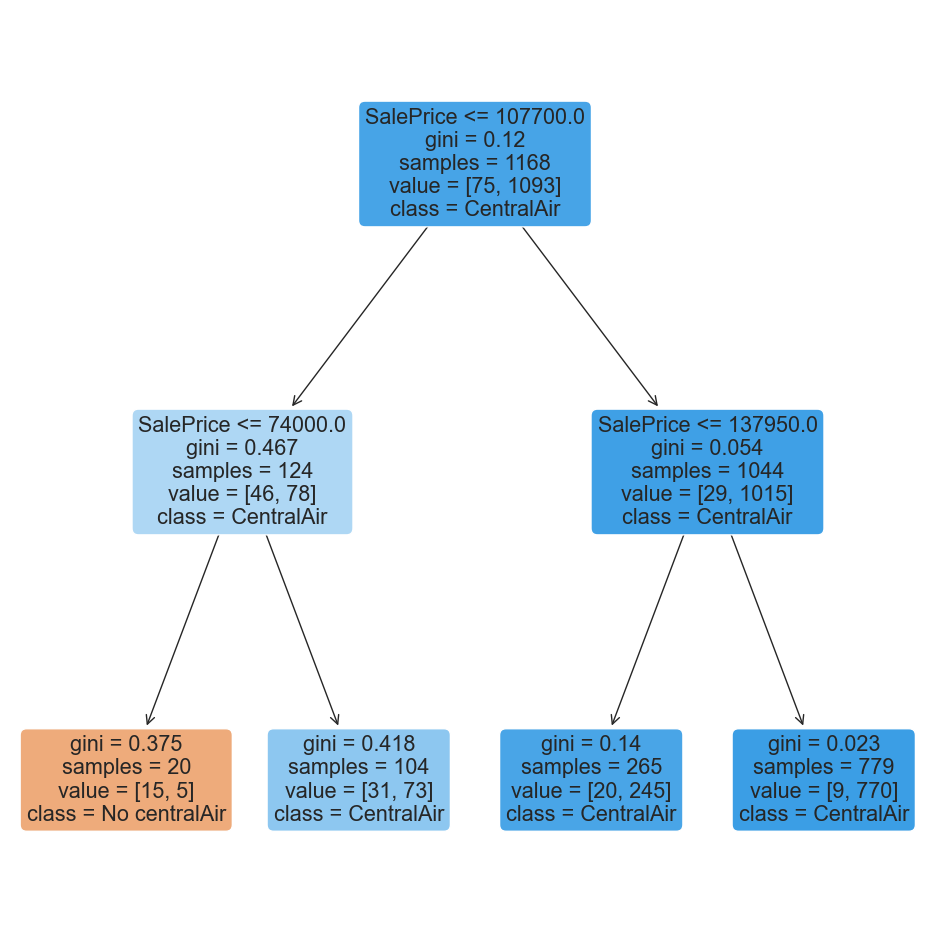

In [35]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)
# Train the Decision Tree Classifier model
dectree.fit(salePrice_train, centralAir_train)
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No centralAir", "CentralAir"])

plt.show()

### 1(a) For max depth 4

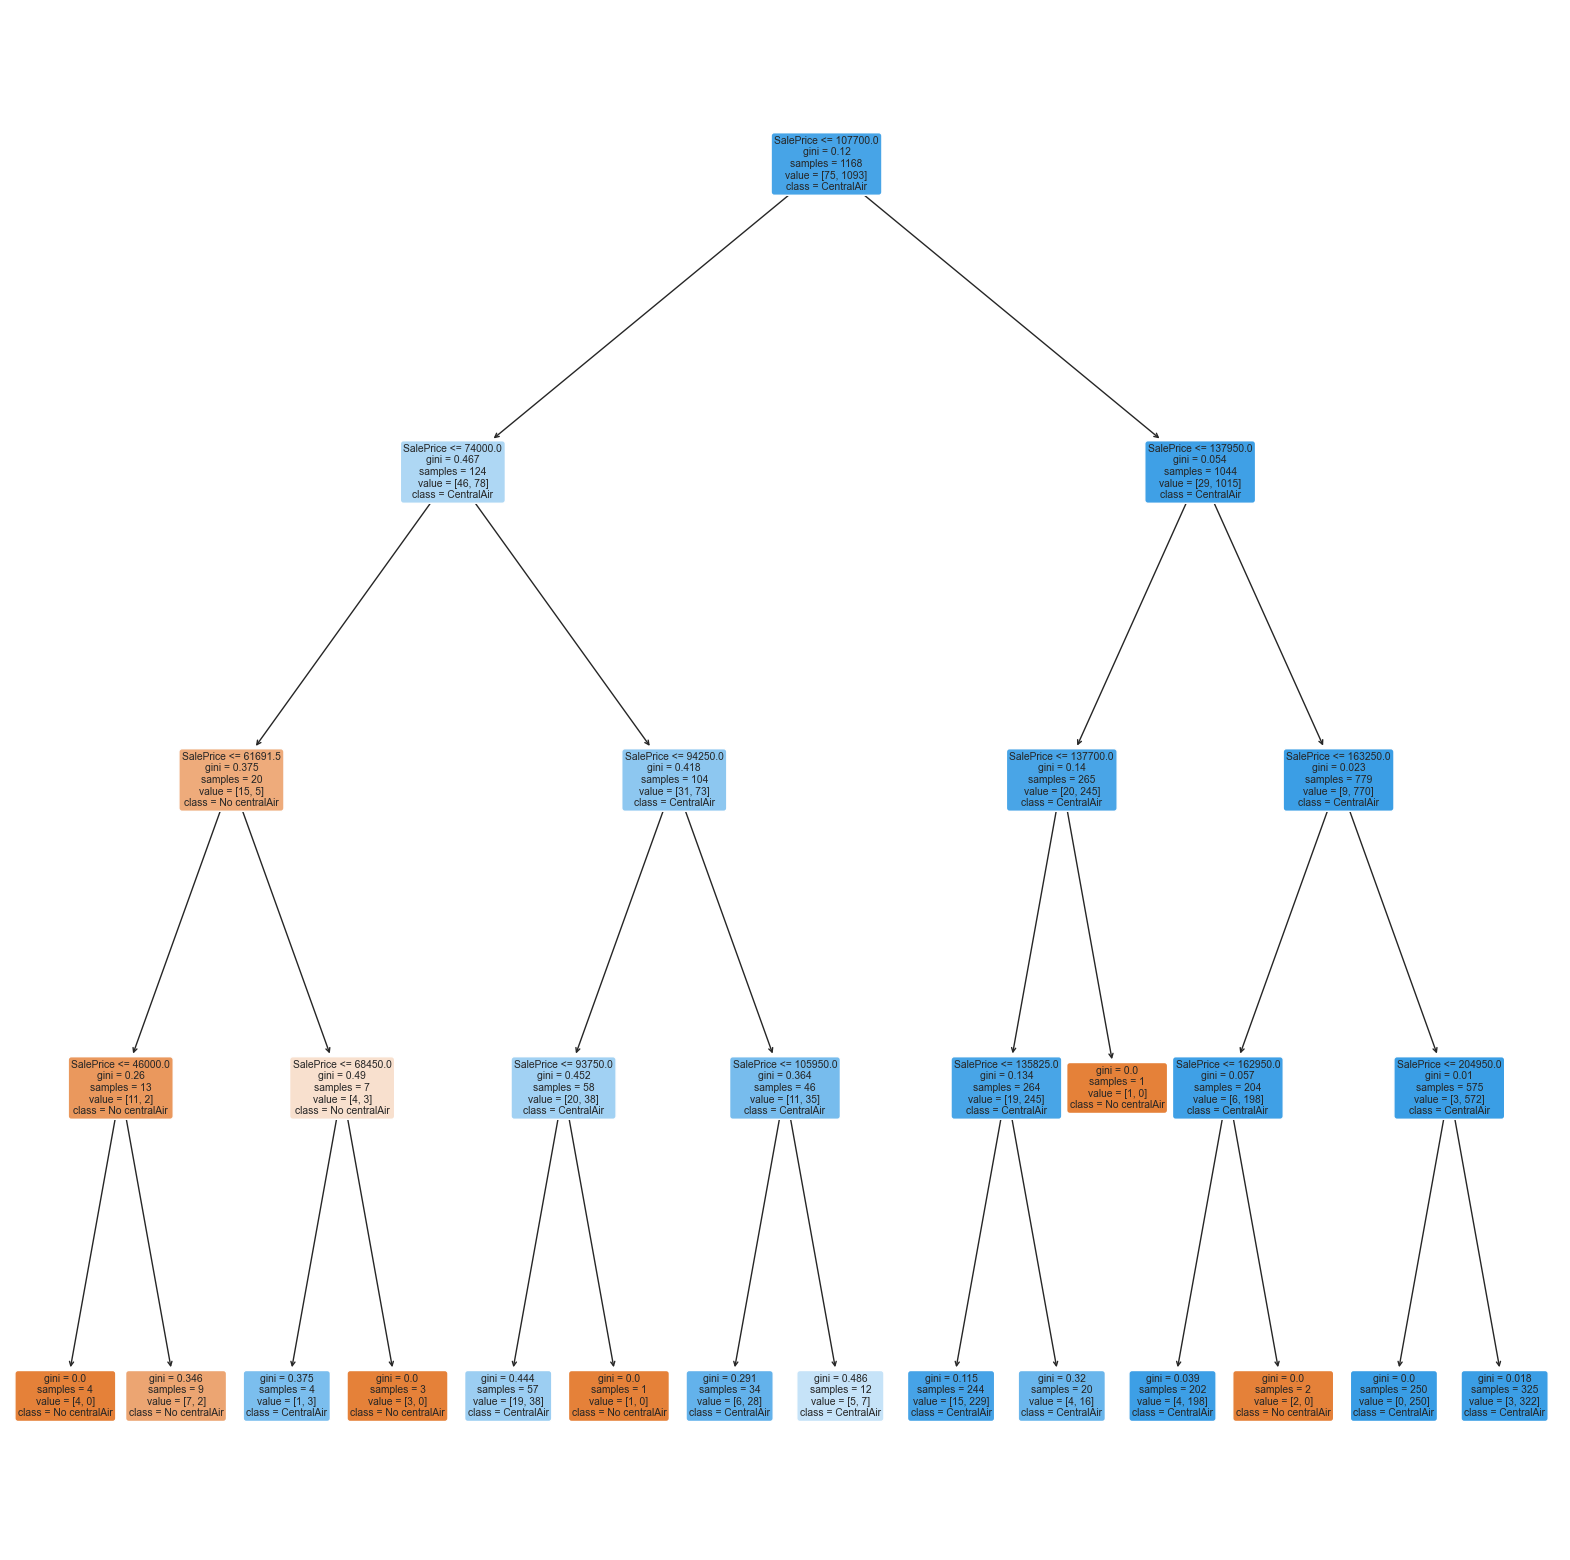

In [36]:
# Create a Decision Tree Classifier object
dectree1 = DecisionTreeClassifier(max_depth = 4)
# Train the Decision Tree Classifier model
dectree1.fit(salePrice_train, centralAir_train)
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(20,20))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No centralAir", "CentralAir"])

plt.show()

## 1(b) Confusion Matrix for:

### 1(b) Train and Test Set of max depth 2 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9443493150684932

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9315068493150684



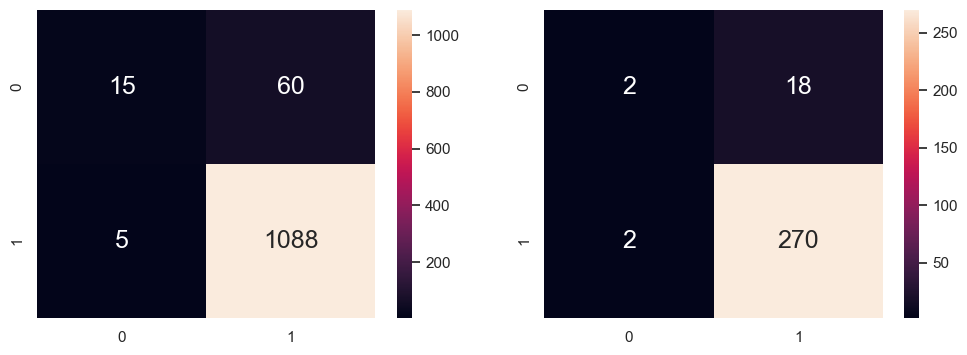

In [38]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

plt.show()

In [1]:
accuracytrain = (15+1088)/1168
print("For depth 2, the classification accuracy for train is ", accuracytrain)
accuracytest = (2+270)/292
print("For depth 2, the classification accuracy for test is ", accuracytest)

tptrain = 1088/(1088+5)
print("For depth 2, true positive rate for train is", tptrain)
tptest = 270/(270+2)
print("For depth 2, true positive rate for test is", tptest)

fptrain = 5/(15+5)
print("For depth 2, false positive rate for train is", fptrain)
fptest = 2/(2+2)
print("For depth 2, false positive rate for test is", fptest)

For depth 2, the classification accuracy for train is  0.9443493150684932
For depth 2, the classification accuracy for test is  0.9315068493150684
For depth 2, true positive rate for train is 0.9954254345837146
For depth 2, true positive rate for test is 0.9926470588235294
For depth 2, false positive rate for train is 0.25
For depth 2, false positive rate for test is 0.5


### 1(b) Train and Test Set of max depth 4

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.949486301369863

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9315068493150684



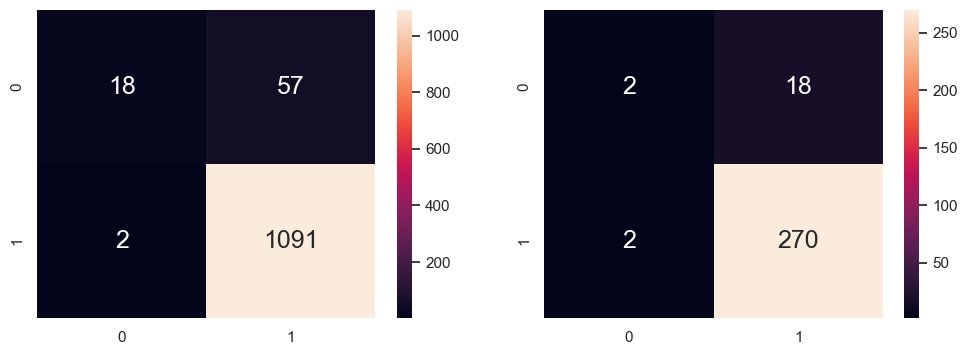

In [39]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

plt.show()

### Comparison of both the trees for Classification Accuracy, True Positive Rate, False Positive Rate.

In [3]:
accuracytrain = (15+1088)/1168
print("For depth 2, the classification accuracy for train is ", accuracytrain)
accuracytest = (2+270)/292
print("For depth 2, the classification accuracy for test is ", accuracytest)

tptrain = 1088/(1088+5)
print("For depth 2, true positive rate for train is", tptrain)
tptest = 270/(270+2)
print("For depth 2, true positive rate for test is", tptest)

fptrain = 5/(15+5)
print("For depth 2, false positive rate for train is", fptrain)
fptest = 2/(2+2)
print("For depth 2, false positive rate for test is", fptest)

###################################################################################################
print("")
print("")

accuracytrain1 = (18+1091)/1168
print("For depth 4, the classification accuracy for train is ", accuracytrain1)
accuracytest1 = (2+270)/292
print("For depth 4, the classification accuracy for test is ", accuracytest1)

tptrain1 = 1091/(1091+2)
print("For depth 4, true positive rate for train is", tptrain1)
tptest1 = 270/(270+2)
print("For depth 4, true positive rate for test is", tptest1)

fptrain1 = 2/(18+2)
print("For depth 4, false positive rate for train is", fptrain1)
fptest1 = 2/(2+2)
print("For depth 4, false positive rate for test is", fptest1)

For depth 2, the classification accuracy for train is  0.9443493150684932
For depth 2, the classification accuracy for test is  0.9315068493150684
For depth 2, true positive rate for train is 0.9954254345837146
For depth 2, true positive rate for test is 0.9926470588235294
For depth 2, false positive rate for train is 0.25
For depth 2, false positive rate for test is 0.5


For depth 4, the classification accuracy for train is  0.949486301369863
For depth 4, the classification accuracy for test is  0.9315068493150684
For depth 4, true positive rate for train is 0.9981701738334858
For depth 4, true positive rate for test is 0.9926470588235294
For depth 4, false positive rate for train is 0.1
For depth 4, false positive rate for test is 0.5


1(a) The model of max depth 4 is better. The test set has the same result for both, so we look at the train set.


For depth 4, the classification accuracy is higher, the true positive rate is higher, the false positive rate is lower than that of depth 2.

## Problem 2

In [56]:
overallQual = pd.DataFrame(houseData['OverallQual'])
yearBuilt = pd.DataFrame(houseData['YearBuilt'])

overallQual.info()
print(" ")
yearBuilt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   YearBuilt  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [58]:
def classificationtree(x):
    X_train, X_test, y_train, y_test = train_test_split(x, centralAir, test_size = 0.20, random_state=20)
        # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
    dectree.fit(X_train, y_train)                    # train the decision tree model

    # Predict Legendary values corresponding to Total
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, y_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))
    print()

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

    plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9426369863013698

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.928082191780822



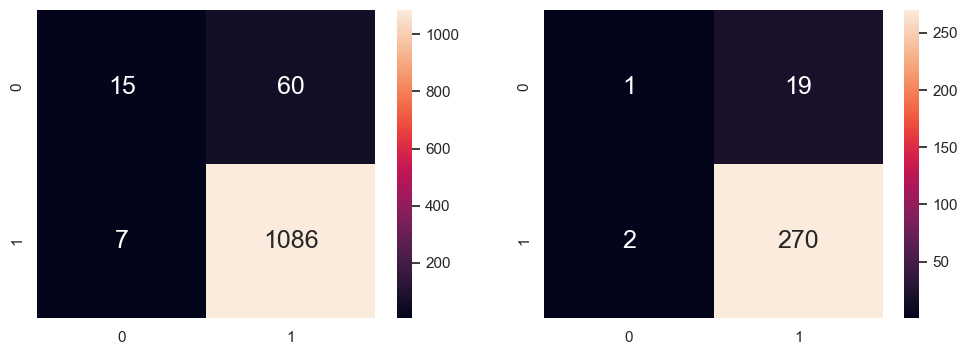

In [59]:
classificationtree(overallQual)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9383561643835616

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.928082191780822



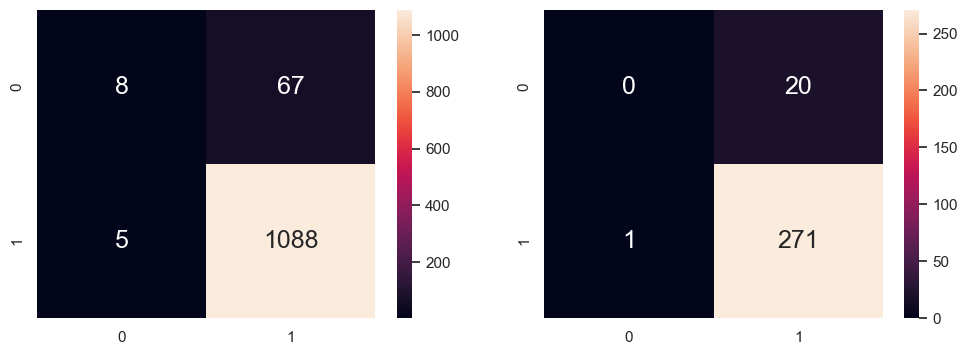

In [60]:
classificationtree(yearBuilt)

In [4]:
print("For OverallQual as var, the classification accuracy for train is 0.9426369863013698")
print("For OverallQual as var, the classification accuracy for test is 0.928082191780822")

tptrain = 1086/(1086+7)
print("For OverallQual as var, true positive rate for train is", tptrain)
tptest = 270/(270+2)
print("For OverallQual as var, true positive rate for test is", tptest)

fptrain = 7/(15+7)
print("For OverallQual as var, false positive rate for train is", fptrain)
fptest = 2/(1+2)
print("For OverallQual as var, false positive rate for test is", fptest)

###################################################################################################
print("")
print("")

print("For YearBuilt as var, the classification accuracy for train is 0.9383561643835616")
print("For YearBuilt as var, the classification accuracy for test is 0.928082191780822")

tptrain1 = 1088/(1088+5)
print("For YearBuilt as var, true positive rate for train is", tptrain1)
tptest1 = 271/(271+1)
print("For YearBuilt as var, true positive rate for test is", tptest1)

fptrain1 = 5/(8+5)
print("For YearBuilt as var, false positive rate for train is", fptrain1)
fptest1 = 1/(0+1)
print("For YearBuilt as var, false positive rate for test is", fptest1)

For OverallQual as var, the classification accuracy for train is 0.9426369863013698
For OverallQual as var, the classification accuracy for test is 0.928082191780822
For OverallQual as var, true positive rate for train is 0.9935956084172004
For OverallQual as var, true positive rate for test is 0.9926470588235294
For OverallQual as var, false positive rate for train is 0.3181818181818182
For OverallQual as var, false positive rate for test is 0.6666666666666666


For YearBuilt as var, the classification accuracy for train is 0.9383561643835616
For YearBuilt as var, the classification accuracy for test is 0.928082191780822
For YearBuilt as var, true positive rate for train is 0.9954254345837146
For YearBuilt as var, true positive rate for test is 0.9963235294117647
For YearBuilt as var, false positive rate for train is 0.38461538461538464
For YearBuilt as var, false positive rate for test is 1.0


2. The best variable is OverallQual. OverallQual has a higher classification accuracy for train. True Positive Rate for train and test set is roughly similar for OverallQual and YearBuilt. Finally OverallQual has a lower False Positive rate for train and test set thus I think OverallQual is a better variable.

## 3(a) 

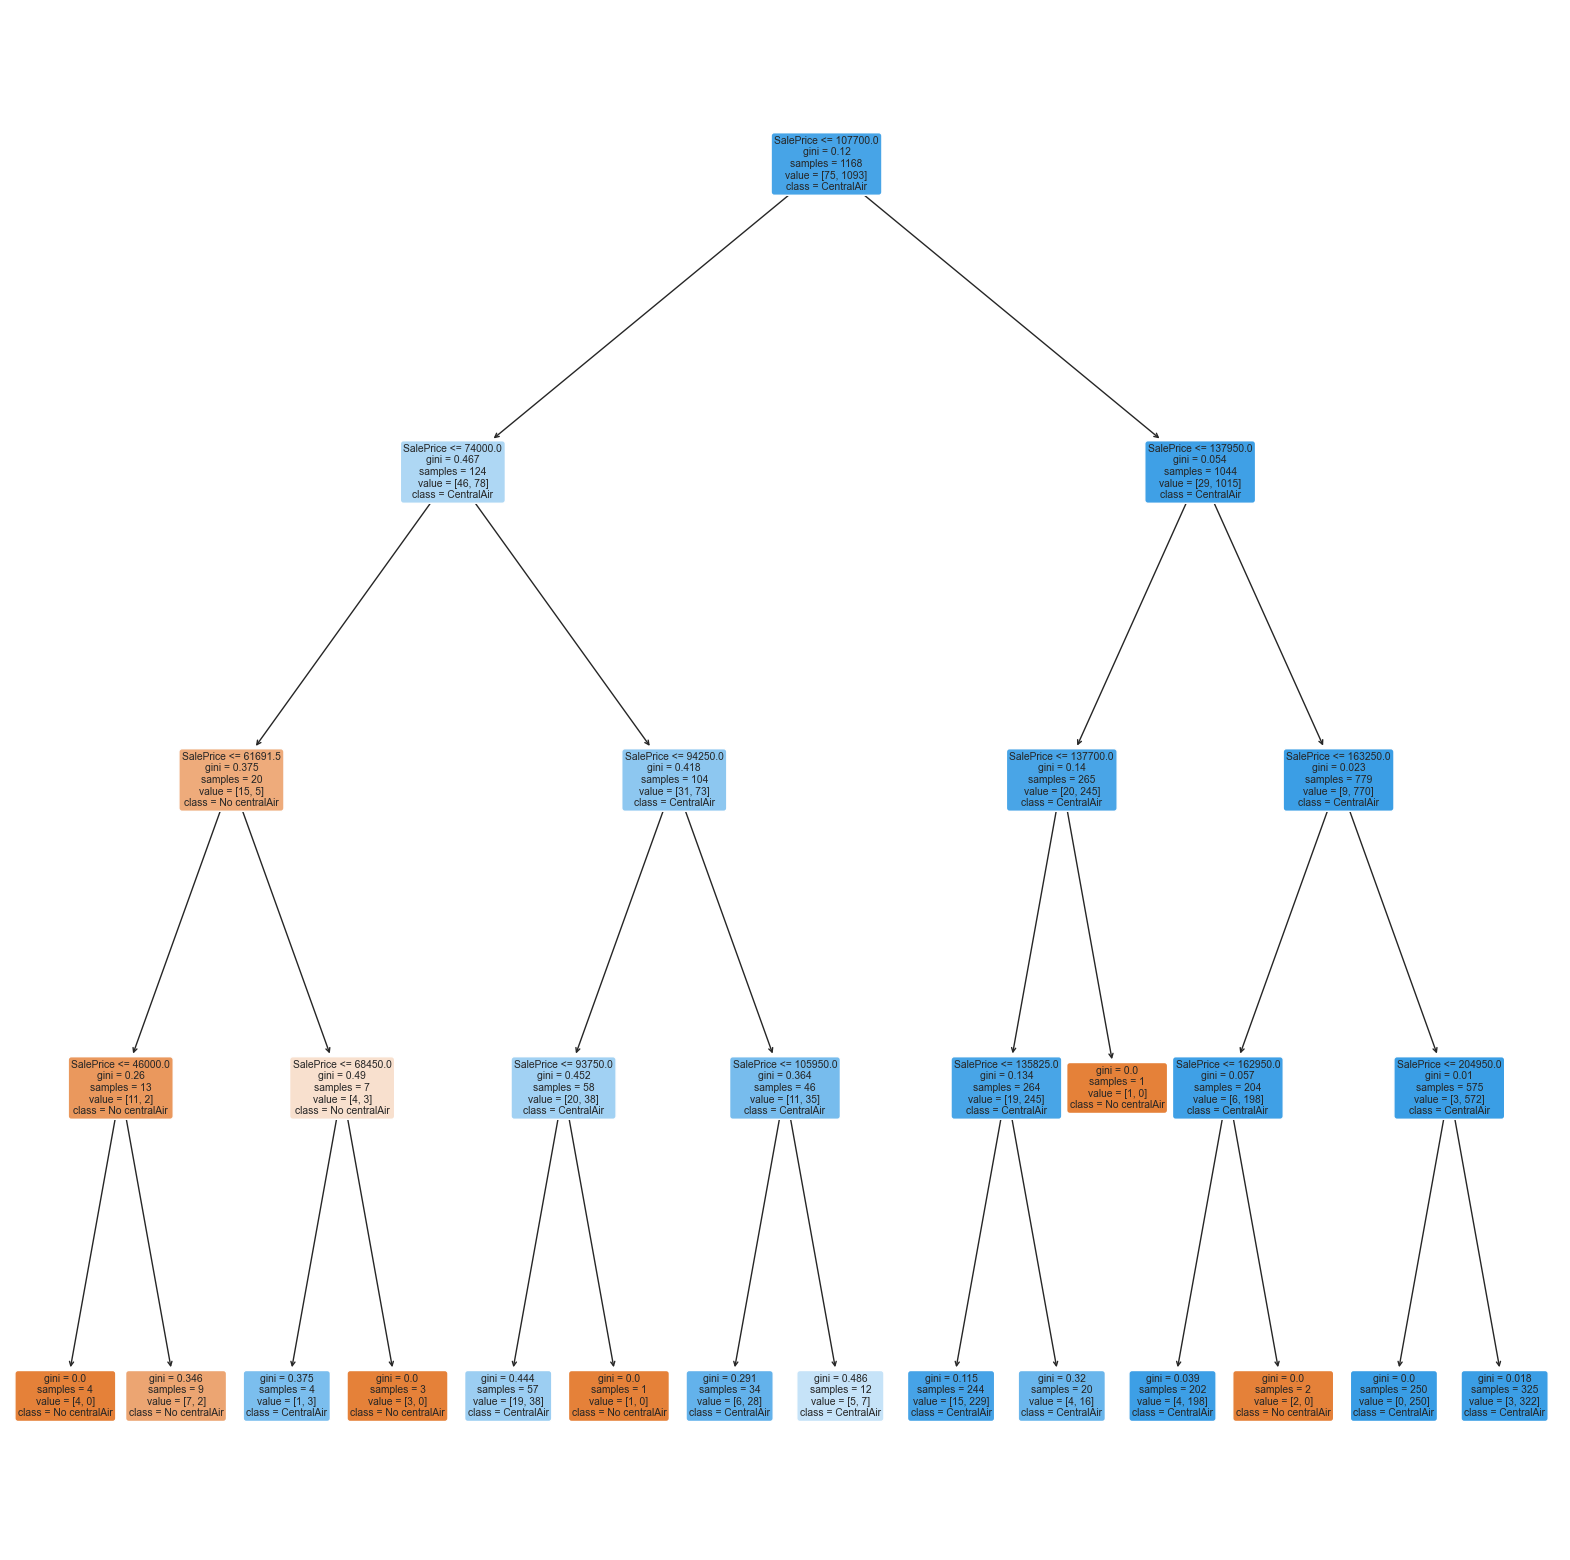

In [62]:
# Create a Decision Tree Classifier object
dectree1 = DecisionTreeClassifier(max_depth = 4)
# Train the Decision Tree Classifier model
dectree1.fit(salePrice_train, centralAir_train)
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(20,20))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No centralAir", "CentralAir"])

plt.show()

(From the left) 
False Positive means predicted to be noCentralAir but in actuality is CentralAir --> [1,0] in class centralAir

Leaf Node 2: 1 count

Leaf Node 5: 19 count --> highest count

Leaf Node 7: 6 count

Leaf Node 8: 5 count

Leaf Node 9: 15 count 

Leaf Node 10: 4 count

Leaf Node 11: 4 count

Leaf Node 14: 3 count

>Leaf Node 9 is in between 74000.0<SalePrice<=93750.0

In [98]:
df1 = salePrice_train.astype(float)
filtered = (df1>74000) & (df1<=93750)
print(filtered)

      SalePrice
1137      False
1335      False
459       False
115       False
908       False
...         ...
924       False
1247      False
271       False
474       False
1379      False

[1168 rows x 1 columns]


In [102]:
#Printing all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.
df2 = salePrice_train['SalePrice'][filtered['SalePrice']]
df2.head(n=57)

287     88000
998     91000
325     87000
649     84500
1218    80500
434     81000
1013    85000
589     79500
75      91000
696     89000
1022    87000
1412    90000
1323    82500
1049    84900
1007    88000
912     88000
489     86000
1143    80000
736     93500
342     87500
915     75000
17      90000
1000    82000
242     79000
1086    83500
431     79900
614     75500
1090    92900
1453    84500
528     86000
235     89500
88      85000
307     89500
1378    83000
1131    93500
383     76000
1376    91000
494     91300
976     85500
430     85400
1219    91500
821     93000
637     93000
1072    91500
1039    80000
1061    81000
39      82000
676     87000
125     84500
1035    84000
341     82000
386     81000
68      80000
655     88000
638     85000
1179    93000
935     79900
Name: SalePrice, dtype: int64

In [100]:
df2.info()

<class 'pandas.core.series.Series'>
Int64Index: 57 entries, 287 to 935
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
57 non-null     int64
dtypes: int64(1)
memory usage: 912.0 bytes


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.949486301369863

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9315068493150684



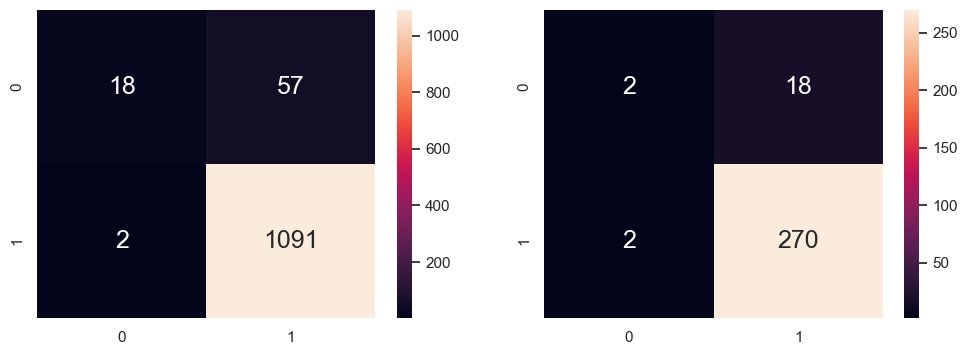

Total Entries  57
      SalePrice CentralAir
287       88000          Y
998       91000          N
325       87000          N
649       84500          Y
1218      80500          N
434       81000          Y
1013      85000          N
589       79500          Y
75        91000          Y
696       89000          Y
1022      87000          Y
1412      90000          N
1323      82500          Y
1049      84900          Y
1007      88000          Y
912       88000          N
489       86000          Y
1143      80000          Y
736       93500          N
342       87500          N
915       75000          Y
17        90000          Y
1000      82000          N
242       79000          N
1086      83500          Y
431       79900          Y
614       75500          Y
1090      92900          N
1453      84500          Y
528       86000          Y
235       89500          Y
88        85000          N
307       89500          Y
1378      83000          Y
1131      93500          Y
383       

In [131]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

plt.show()

jointDF = pd.concat([X_train, y_train], axis=1).reindex(X_train.index)
newdf1 = jointDF[(jointDF['SalePrice']>74000) & (jointDF['SalePrice']<=93750)]

pd.set_option('display.max_rows', None)
print("Total Entries ", newdf1['CentralAir'].count())
print(newdf1)

In [124]:
newdf1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   bool 
dtypes: bool(1)
memory usage: 1.6 KB


In [132]:
newdf1_false = newdf1[(newdf1['CentralAir']) == 'N']
print("Total False Positive Entries: ", newdf1_false['CentralAir'].count())
print(newdf1_false)

Total False Positive Entries:  19
      SalePrice CentralAir
998       91000          N
325       87000          N
1218      80500          N
1013      85000          N
1412      90000          N
912       88000          N
736       93500          N
342       87500          N
1000      82000          N
242       79000          N
1090      92900          N
88        85000          N
383       76000          N
1376      91000          N
821       93000          N
39        82000          N
676       87000          N
125       84500          N
1035      84000          N
